# Basic execution of the eco-evolutionary model

A simple example showcasing how to execute the eco-evolutionary model **without coupling** it to FastScape.

## Import libraries

As the first step, we need to import a few standard Python library to manipulate arrays ([numpy](https://numpy.org/)), to plot results ([matplotlib](https://matplotlib.org/)) and a couple of custoum-made funtions or methods we build to encapsulate the execution of a single model run (**single_model_run**) and show the results into two type of plots. The custoum-made functions can be imported from the file **extra_func.py**. The documentation of each function can be acessed by typing the function name together with the question mark: 

```python
extra.single_model_run?
```

In [1]:
import numpy as np
import extra_func as extra
import matplotlib.pyplot as plt

%matplotlib inline

## Build a simple environmental field

First, we build the 2D environmental field. For this, we use [numpy.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to create an environmental gradient that linearly increases along the x coordinate.

In [2]:
length = (250, 250)
spacing = (1, 1)

x, y = np.meshgrid(*[np.arange(0, l+s, s) for l, s in zip(length, spacing)])

environment = x * 10

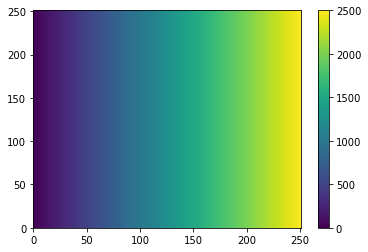

In [3]:
plt.pcolormesh(environment)
plt.colorbar()

## Speciation model without trait-mediated competition

To execute a run simply we call the method **model_run**, modify parameter values as requiered and store the result in a data frame **df1** for futher analysis. The [Python magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html) **%time** is a function to time the execution of the run and it is not essential for the execution of a model.

In [4]:
%time df1 = extra.single_model_run(environment, x, y)
df1

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    lifespan: None
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.05
    taxon_def: traits
    rho: 0
    nb_radius: 50
    car_cap: 50
    sigma_env_fitness: 0.2
    sigma_disp: 30
    sigma_mut: 0.05
    mut_prob: 0.005
    sigma_comp_trait: 1.0



/Users/acevedo/opt/anaconda3/envs/adascape-dev/lib/python3.10/site-packages/scipy/cluster/vq.py:603: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


CPU times: user 3min 41s, sys: 8.33 s, total: 3min 50s
Wall time: 14.9 s


,step,time,dt,x,y,taxon_id,ancestor_id,n_offspring,fitness,n_all,n_eff,trait_0
0,0,0.0,0.0,244.174942,110.251531,1.0,0.0,4,0.077610,1,1.000000,0.500000
1,0,0.0,0.0,95.048934,152.467702,1.0,0.0,14,0.850059,3,3.000000,0.500000
2,0,0.0,0.0,230.811558,215.905324,1.0,0.0,7,0.131586,1,1.000000,0.500000
3,0,0.0,0.0,65.423106,215.939418,1.0,0.0,7,0.522150,4,4.000000,0.500000
4,0,0.0,0.0,79.774265,168.720328,1.0,0.0,9,0.693841,4,4.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
414,499,499.0,0.0,96.853754,60.871206,2745.0,2739.0,1,0.662181,50,47.808153,0.212004
415,499,499.0,0.0,22.534519,213.686390,2747.0,2741.0,1,0.628839,47,46.206122,0.305041
416,499,499.0,0.0,132.933024,16.022530,2747.0,2741.0,1,0.429317,40,37.329458,0.270314
417,499,499.0,0.0,65.293875,41.005030,2747.0,2741.0,1,0.999964,53,52.206784,0.270314


The first type of plot shows the distribution of organims at selected time steps (**plot_spatial_dist**).

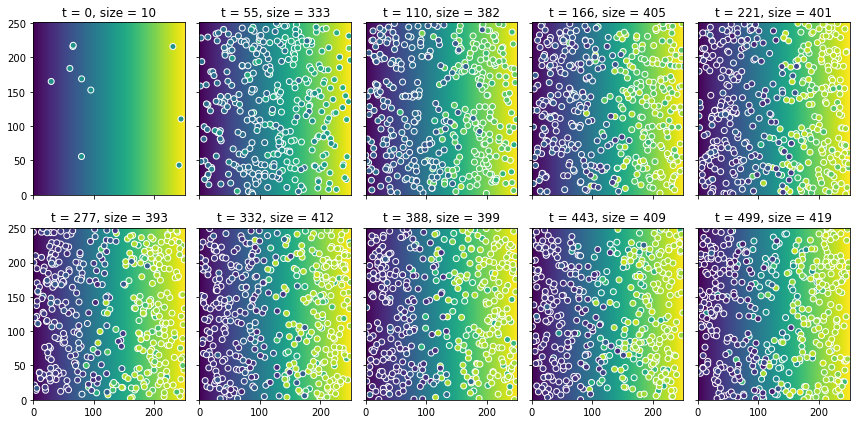

In [5]:
extra.plot_spatial_dist(df1, environment)

The second type of plot shows  **plot_sol** the abundance of individuals and trait distribution (as 2d histogram, where darker color means higher frequencies/number of observations) over time, together with the spatial location of individuals and trait distribution along the x-coordinate at the last time step.

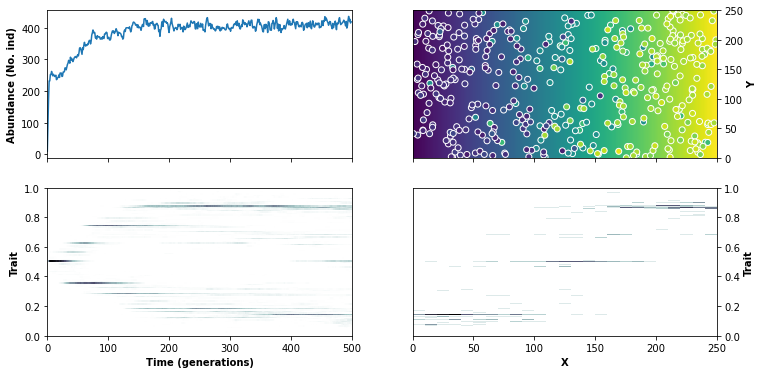

In [6]:
extra.plot_sol(df1, environment, x)

## Speciation model with trait-mediated competition

Then we can vary the parameters values to show, for example, the impact of trait-mediated competition on the trait dynamics

In [7]:
%time df2 = extra.single_model_run(environment, x, y, sigma_comp_trait=0.20, car_cap=30)
df2

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    lifespan: None
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.05
    taxon_def: traits
    rho: 0
    nb_radius: 50
    car_cap: 30
    sigma_env_fitness: 0.2
    sigma_disp: 30
    sigma_mut: 0.05
    mut_prob: 0.005
    sigma_comp_trait: 0.2



/Users/acevedo/opt/anaconda3/envs/adascape-dev/lib/python3.10/site-packages/scipy/cluster/vq.py:603: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


CPU times: user 3min 4s, sys: 7.04 s, total: 3min 11s
Wall time: 12.7 s


,step,time,dt,x,y,taxon_id,ancestor_id,n_offspring,fitness,n_all,n_eff,trait_0
0,0,0.0,0.0,244.174942,110.251531,1.0,0.0,2,0.077610,1,1.000000,0.500000
1,0,0.0,0.0,95.048934,152.467702,1.0,0.0,9,0.850059,3,3.000000,0.500000
2,0,0.0,0.0,230.811558,215.905324,1.0,0.0,4,0.131586,1,1.000000,0.500000
3,0,0.0,0.0,65.423106,215.939418,1.0,0.0,4,0.522150,4,4.000000,0.500000
4,0,0.0,0.0,79.774265,168.720328,1.0,0.0,5,0.693841,4,4.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
343,499,499.0,0.0,13.728433,38.201775,3365.0,3356.0,1,0.959388,28,23.584289,0.135792
344,499,499.0,0.0,128.568005,148.138277,3365.0,3356.0,1,0.165401,37,9.315079,0.135792
345,499,499.0,0.0,14.498010,198.657180,3365.0,3356.0,1,0.700966,33,26.501726,0.246793
346,499,499.0,0.0,21.419103,159.692519,3365.0,3356.0,1,0.988066,30,27.440123,0.135792


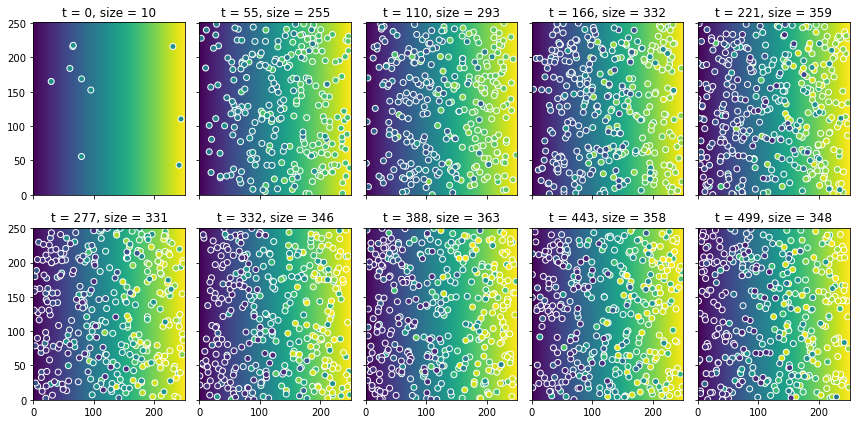

In [8]:
extra.plot_spatial_dist(df2, environment)

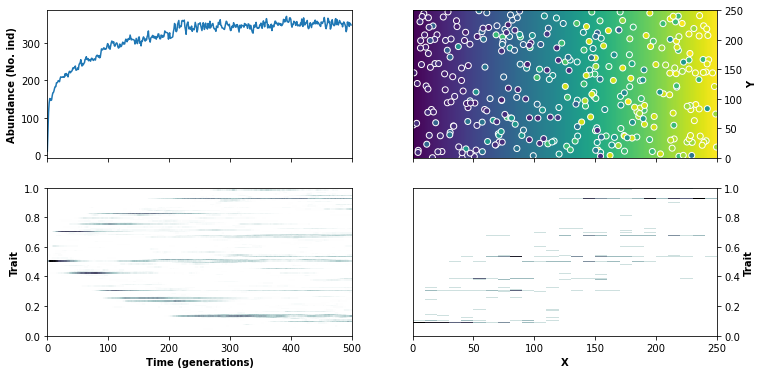

In [9]:
extra.plot_sol(df2, environment, x)